 #  Movie Recommendation System

# Problem statement

## Movie lovers often struggle to find movies that match their tastes. There is a large number of movies available, but recommending them effectively is a challenge. Without a personalized recommendation system, users may miss out on movies they would enjoy.

# Objective

## Build a movie recommendation system that suggests movies based on a user's previous ratings or preferences, using movie characteristics like genre, IMDB rating, and actors.

In [1]:
import pandas as pd

# Dataset लोड करना

data = pd.read_csv('C:/Users/owner/Desktop/kavitaaaa/imdb_top_1000.csv')



data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
# Missing values की जांच
print(data.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# Load dataset (replace with your dataset path)


# Handle missing data if any
data = pd.read_csv('C:/Users/owner/Desktop/kavitaaaa/imdb_top_1000.csv')


# One-hot encoding for genre (or use LabelEncoder for simplicity)
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])

# TF-IDF Vectorization for movie overview (description)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Overview'])  # This will return a sparse matrix

# Now, calculate cosine similarity using the tfidf_matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a mapping of movie titles to their index
indices = pd.Series(data.index, index=data['Series_Title']).to_dict()

# Show the shape of the cosine similarity matrix to ensure everything is fine
print("Cosine Similarity Matrix Shape:", cosine_sim.shape)

# Function to get movie recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with the selected movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar movies
    return data['Series_Title'].iloc[movie_indices] 



# Example: Get recommendations for a specific movie
recommended_movies = get_recommendations('12 Angry Men')
print("Recommended Movies:", recommended_movies)

Cosine Similarity Matrix Shape: (1000, 1000)
Recommended Movies: 791                      Road to Perdition
95                                  Amélie
69                                 Memento
40                      American History X
495                     The Man from Earth
162                      L.A. Confidential
270               Kaze no tani no Naushika
479             X-Men: Days of Future Past
675             Back to the Future Part II
539    Le charme discret de la bourgeoisie
Name: Series_Title, dtype: object


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Load and preprocess dataset
data = pd.read_csv('C:/Users/owner/Desktop/kavitaaaa/imdb_top_1000.csv')
data['Overview'] = data['Overview'].fillna('')
data['Genre'] = data['Genre'].fillna('')
data['Combined'] = data['Overview'] + ' ' + data['Genre']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Combined'])

# Cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim = csr_matrix(cosine_sim)

# Create a mapping of movie titles to their index
indices = pd.Series(data.index, index=data['Series_Title']).to_dict()

# Recommendation function
def get_recommendations(title, num_recommendations=10, cosine_sim=cosine_sim):
    if title not in indices:
        return f"Movie '{title}' not found in the dataset."
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx].toarray().flatten()))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]
    recommendations = data.iloc[movie_indices][['Series_Title', 'Genre', 'IMDB_Rating']]
    return recommendations

# Example usage
recommended_movies = get_recommendations('12 Angry Men', num_recommendations=10)
print("Recommended Movies:")
print(recommended_movies.to_string(index=False))

Recommended Movies:
                                   Series_Title                         Genre  IMDB_Rating
                              Road to Perdition        Crime, Drama, Thriller          7.7
                                         Amélie               Comedy, Romance          8.3
                              L.A. Confidential         Crime, Drama, Mystery          8.2
                             American History X                         Drama          8.5
                                        Memento             Mystery, Thriller          8.4
                             The Man from Earth       Drama, Fantasy, Mystery          7.9
                       Kaze no tani no Naushika Animation, Adventure, Fantasy          8.1
                     X-Men: Days of Future Past     Action, Adventure, Sci-Fi          7.9
Birdman or (The Unexpected Virtue of Ignorance)                 Comedy, Drama          7.7
                                           Baby       Action, Crime, T

# Top Genres Distribution

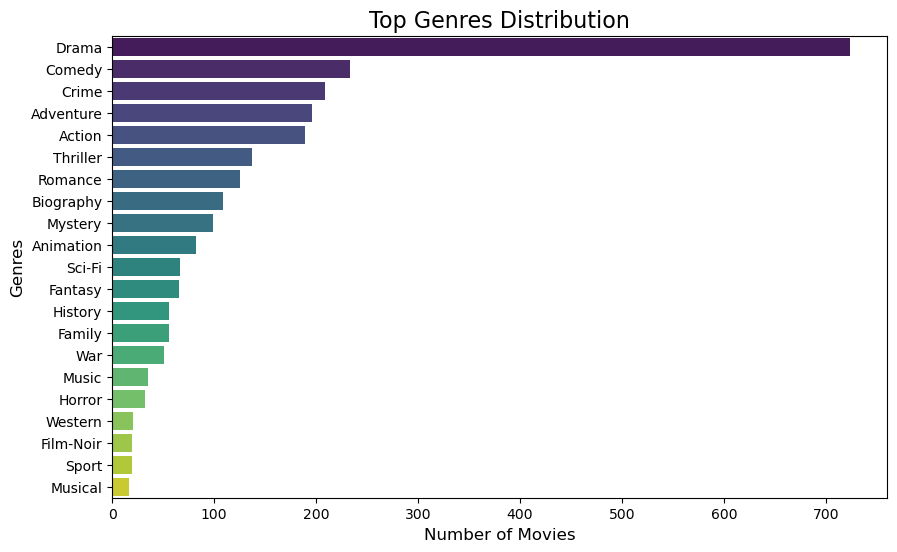

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split genres into multiple rows for better visualization
genre_counts = data['Genre'].str.split(', ').explode().value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top Genres Distribution', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.show()

# Top Rated Movies

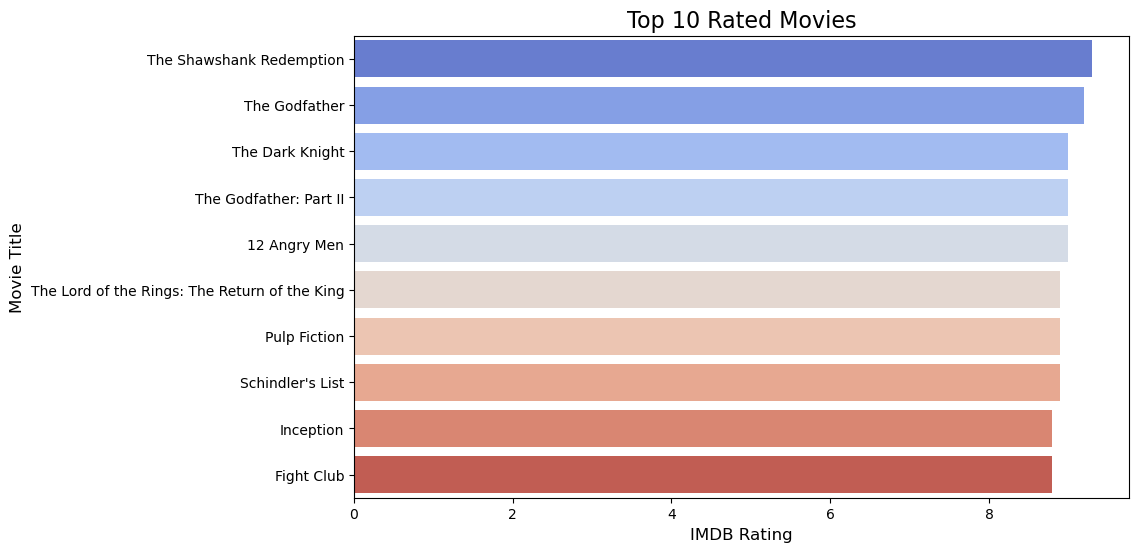

In [5]:
# Select top 10 movies by IMDB rating
top_movies = data.nlargest(10, 'IMDB_Rating')[['Series_Title', 'IMDB_Rating']]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_movies, palette='coolwarm')
plt.title('Top 10 Rated Movies', fontsize=16)
plt.xlabel('IMDB Rating', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.show()

 # Genre Popularity in Recommendations

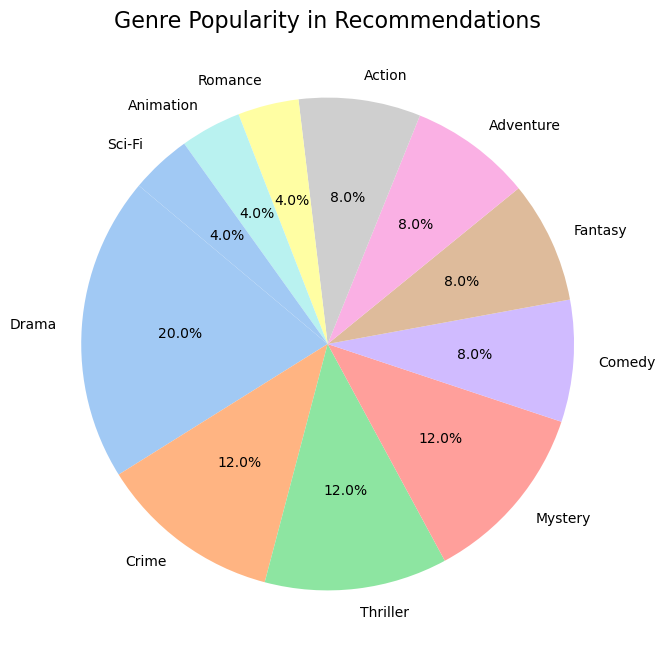

In [6]:
# Get recommendations for a movie
recommended_movies = get_recommendations('12 Angry Men', num_recommendations=10)

# Extract genres from recommended movies
recommended_genres = recommended_movies['Genre'].str.split(', ').explode().value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(recommended_genres.values, labels=recommended_genres.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Genre Popularity in Recommendations', fontsize=16)
plt.show()

Recommended Movies:
                                   Series_Title                         Genre  IMDB_Rating
                              Road to Perdition        Crime, Drama, Thriller          7.7
                                         Amélie               Comedy, Romance          8.3
                              L.A. Confidential         Crime, Drama, Mystery          8.2
                             American History X                         Drama          8.5
                                        Memento             Mystery, Thriller          8.4
                             The Man from Earth       Drama, Fantasy, Mystery          7.9
                       Kaze no tani no Naushika Animation, Adventure, Fantasy          8.1
                     X-Men: Days of Future Past     Action, Adventure, Sci-Fi          7.9
Birdman or (The Unexpected Virtue of Ignorance)                 Comedy, Drama          7.7
                                           Baby       Action, Crime, T

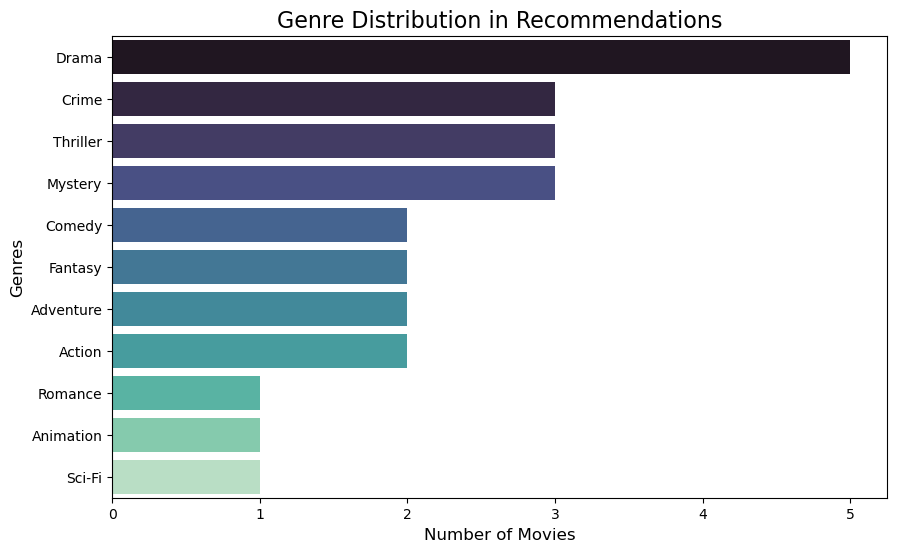

In [7]:
# Get recommendations
recommended_movies = get_recommendations('12 Angry Men', num_recommendations=10)
print("Recommended Movies:")
print(recommended_movies.to_string(index=False))

# Visualize genres in recommendations
recommended_genres = recommended_movies['Genre'].str.split(', ').explode().value_counts()

# Plot genres as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=recommended_genres.values, y=recommended_genres.index, palette='mako')
plt.title('Genre Distribution in Recommendations', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.show()
